# Visualizing results of onine meta analyses of the same topic

I searched for the term "decision making" in these two websites, and downloaded the results:
- NeuroSynth: https://neuroquery.saclay.inria.fr/ 
- NeuroQuery: https://neuroquery.saclay.inria.fr/ 


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import functions as fun
from nistats import thresholding
import numpy as np
import nibabel as nib
import nilearn
from nilearn import masking, plotting
import matplotlib.pyplot as plt

template = nilearn.datasets.load_mni152_template()
affine = template.affine

level = .05
height_control = 'fdr'
cluster_threshold = 1
sample_size=119

cut_coords=(0, 0, 0)

191030-21:48:15,888 nipype.utils INFO:
	 Running nipype version 1.2.3 (latest: 1.2.3)


INFO:nipype.utils:Running nipype version 1.2.3 (latest: 1.2.3)


In [2]:
neuroquery_img = '../online_meta-analysis_results/NQ_decision_making.nii.gz'

neuroquery_img_thr = thresholding.map_threshold(neuroquery_img, alpha=level,
                                           height_control=height_control,
                                           cluster_threshold=cluster_threshold)[0]
neurosynth_img_assoc =\
     '../online_meta-analysis_results/NS_decision-making_association-test_z_FDR_0.01.nii.gz'
neurosynth_img_uniform = \
     '../online_meta-analysis_results/NS_decision-making_uniformity-test_z_FDR_0.01.nii.gz'

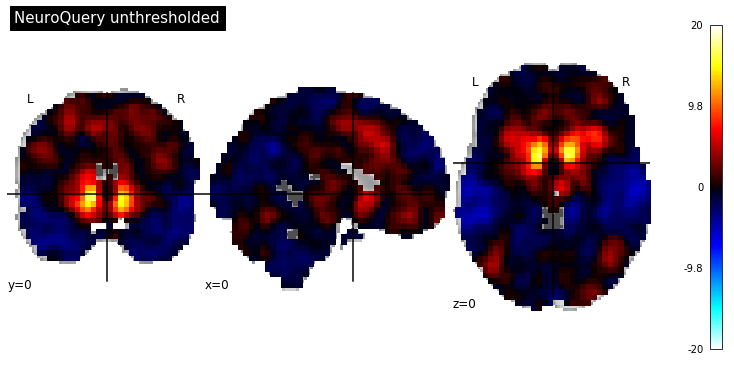

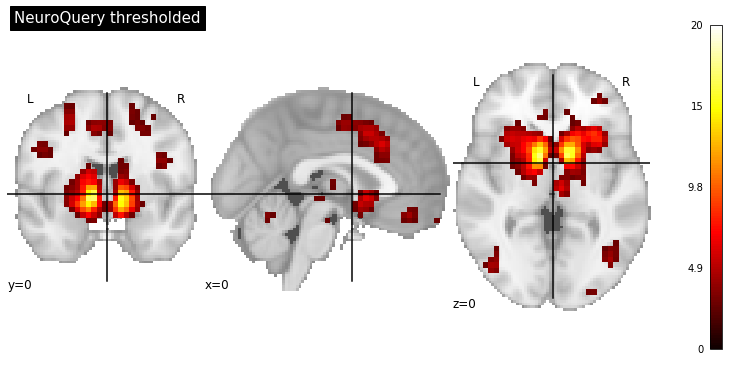

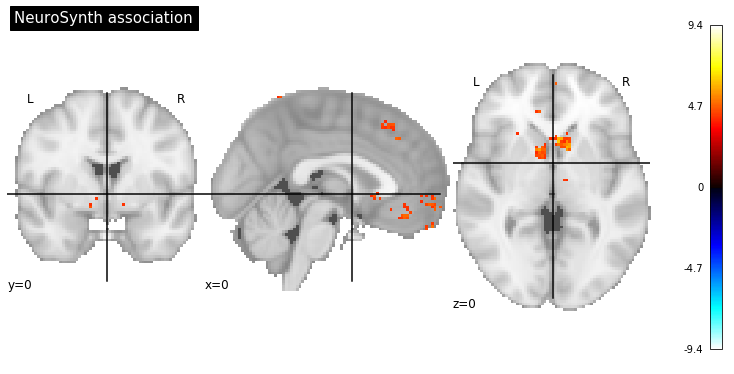

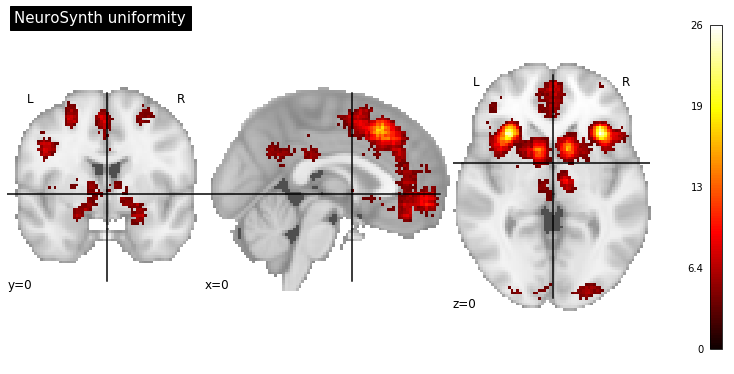

In [3]:
images = { 
    'NeuroQuery unthresholded': neuroquery_img,
    'NeuroQuery thresholded': neuroquery_img_thr,
    'NeuroSynth association': neurosynth_img_assoc,
    'NeuroSynth uniformity': neurosynth_img_uniform,
}

for name, img in images.items():
    plotting.plot_stat_map(img, title=name, cut_coords=cut_coords,
                          figure=plt.figure(figsize=(10,5)))  
    plt.savefig('../figures/results_%s.png' %name.replace(' ', '-'))